In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
end_date

'2017-08-23'

2017-08-23 2016-08-23 00:00:00


<function matplotlib.pyplot.show(*args, **kw)>

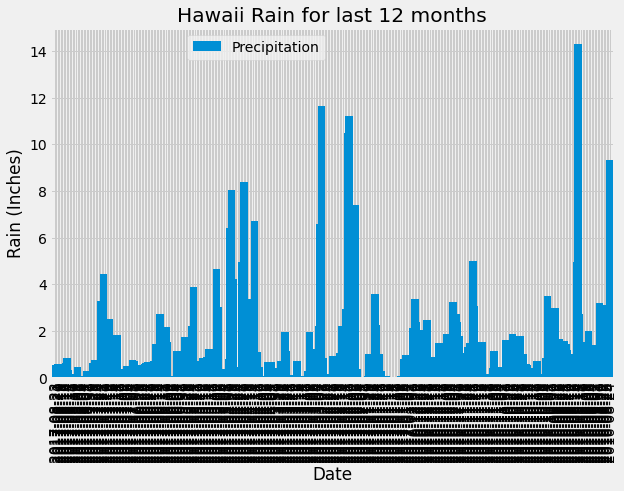

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.

start_date = dt.datetime.strptime(end_date, '%Y-%m-%d') - dt.timedelta(days=365)
print(end_date,start_date)

# Perform a query to retrieve the data and precipitation scores

prec_scores = session.query(Measurement.date, func.SUM(Measurement.prcp)).filter(Measurement.date >= start_date).group_by(Measurement.date).all()
prec_scores

# Save the query results as a Pandas DataFrame and set the index to the date column

prec_df = pd.DataFrame(prec_scores, columns=['Date', 'Precipitation'])
prec_df = prec_df.set_index('Date')
prec_df.head(10)

# Sort the dataframe by date

prec_df = prec_df.sort_values('Date', ascending = False)
prec_df.head(10)


# Use Pandas Plotting with Matplotlib to plot the data


prec_plot = prec_df.plot(kind='bar', width=5, figsize=(9,6))
plt.title("Hawaii Rain for last 12 months")
plt.xlabel("Date")
plt.ylabel("Rain (Inches)")
plt.legend(bbox_to_anchor=(.5,1))
plt.show



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,Precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).count()
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station_list = session.query(Measurement.station, func.COUNT(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
active_station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = active_station_list[0][0]

session.query(func.MIN(Measurement.tobs), func.MAX(Measurement.tobs), func.AVG(Measurement.tobs)).filter(Measurement.station == active_station).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Temperature for station USC00519281')

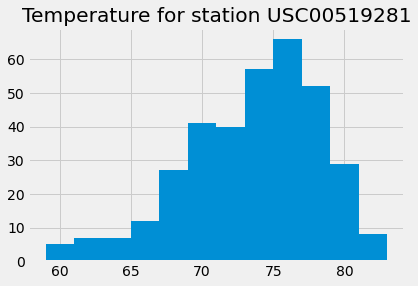

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_data = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date >= start_date).filter(Measurement.station == active_station).all()
temp_obs_df = pd.DataFrame(active_data)

histogram = plt.hist(temp_obs_df['tobs'],bins=12)
plt.title(f"Temperature for station {active_station}")


# Close session

In [16]:
# Close Session
session.close()